# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

In [2]:
import pandas as pd

##### Excercise 1
Use adult.csv and Boolean Masking to answer the following questions. 

In [3]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


    a)	Calculate the mean and median of education-num for every race in the data. 
    b)	Draw one histogram of education-num that includes the data for each race in the data. 
    c)	Draw a comparative boxplot that compares the education-num for each race.
    d)	Create a subplot that puts the visual from b on top of the one on c.

In [11]:
# a) Calculate the mean and median of education-num for every race in the data.
races = adult_df['race'].unique()

for race in races:
    mask = adult_df['race'] == race
    mean = adult_df.loc[mask, 'education-num'].mean()
    median = adult_df.loc[mask, 'education-num'].median()
    print(f"Race: {race}\n  Mean: {mean: 1f}, Median: {median: .0f}\n")

Race: White
  Mean:  10.135246, Median:  10

Race: Black
  Mean:  9.486236, Median:  9

Race: Asian-Pac-Islander
  Mean:  10.960539, Median:  10

Race: Amer-Indian-Eskimo
  Mean:  9.311897, Median:  9

Race: Other
  Mean:  8.841328, Median:  9



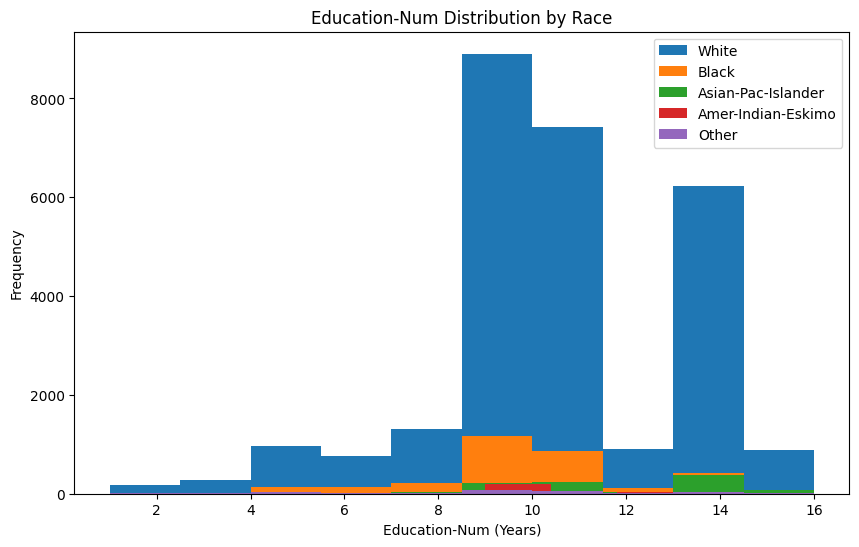

In [26]:
# b) Draw one histogram of education-num that includes the data for each race in the data.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for race in adult_df['race'].unique():
    plt.hist(
        adult_df[adult_df['race'] == race]['education-num'],
        label=race
    )

plt.title('Education-Num Distribution by Race')
plt.xlabel('Education-Num (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

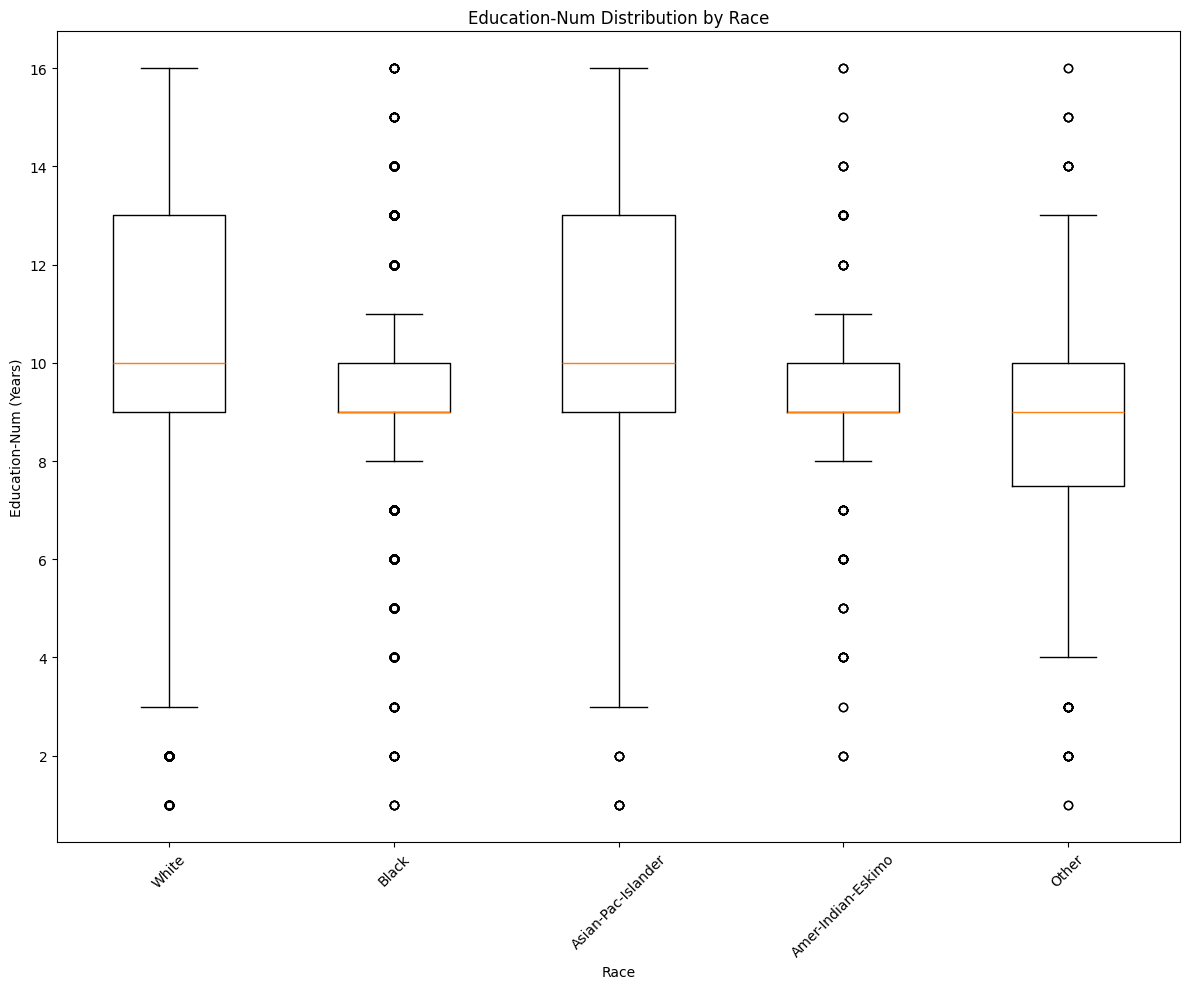

In [39]:
# c) Draw a comparative boxplot that compares the education-num for each race.

import matplotlib.pyplot as plt

# Prepare data: List of arrays (one per race)
data = [
    adult_df[adult_df['race'] == race]['education-num'].values 
    for race in adult_df['race'].unique()
]
labels = adult_df['race'].unique()

# Create boxplot
plt.figure(figsize=(12, 10))
plt.boxplot(data, tick_labels=labels)

# Customize
plt.title('Education-Num Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Education-Num (Years)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

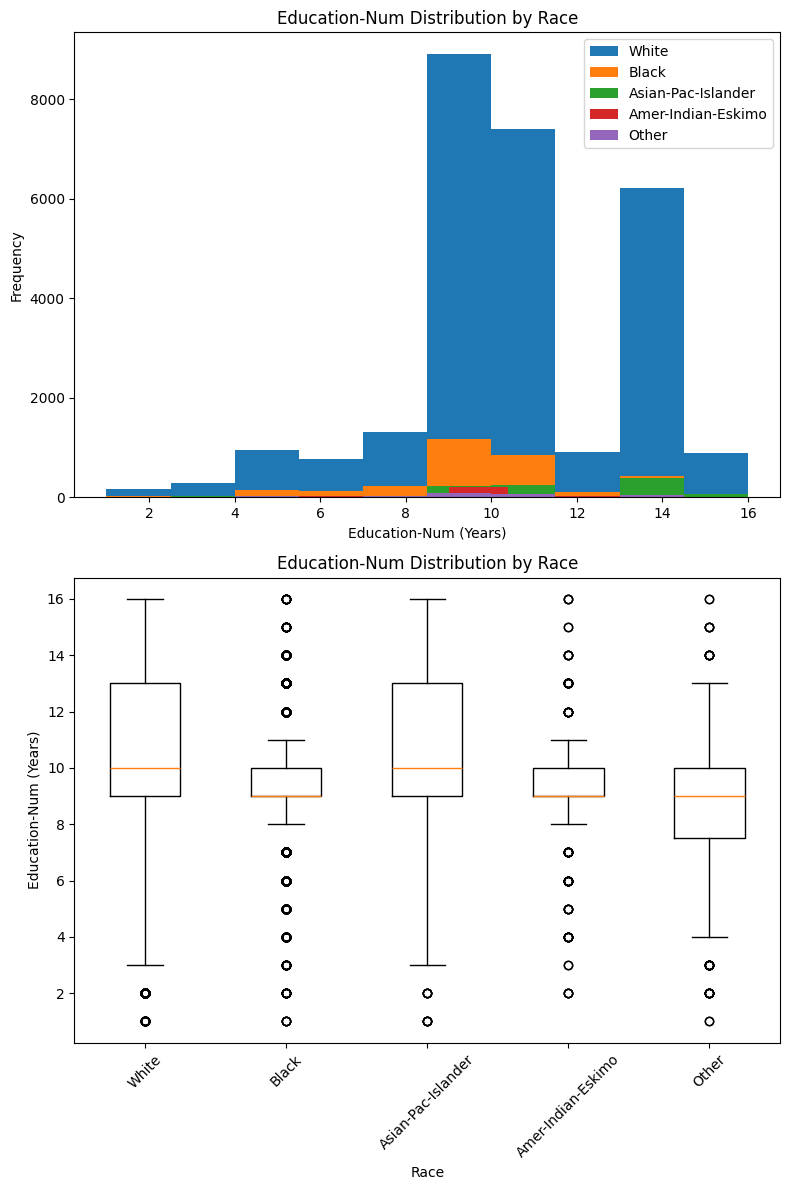

In [48]:
# d) Create a subplot that puts the visual from b on top of the one on c.

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
for race in adult_df['race'].unique():
    plt.hist(
        adult_df[adult_df['race'] == race]['education-num'],
        label=race
    )
plt.title('Education-Num Distribution by Race')
plt.xlabel('Education-Num (Years)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
data = [
    adult_df[adult_df['race'] == race]['education-num'].values 
    for race in adult_df['race'].unique()
]
labels = adult_df['race'].unique()
plt.boxplot(data, tick_labels=labels)
plt.title('Education-Num Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Education-Num (Years)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### Excercise 2    
    a)	Repeat the analysis on Exercise 1. a), but this time use groupby function. 
    b)	compare the runtime of using BM vs. groupby. (hint: you can import the module time and use the fuction .time()) 


In [54]:
# a) Repeat the analysis on Exercise 1. a), but this time use groupby function.

print(adult_df.groupby('race')['education-num'].agg(['mean', 'median']))

                         mean  median
race                                 
Amer-Indian-Eskimo   9.311897     9.0
Asian-Pac-Islander  10.960539    10.0
Black                9.486236     9.0
Other                8.841328     9.0
White               10.135246    10.0


In [56]:
# b) compare the runtime of using BM vs. groupby. (hint: you can import the module time and use the fuction .time())

import time

# Boolean Masking Approach
def boolean_masking_stats():
    races = adult_df['race'].unique()
    for race in races:
        mask = adult_df['race'] == race
        mean = adult_df.loc[mask, 'education-num'].mean()
        median = adult_df.loc[mask, 'education-num'].median()

# GroupBy Approach
def groupby_stats():
    grouped_stats = adult_df.groupby('race')['education-num'].agg(['mean', 'median'])

# Measure runtime
n_iterations = 100

# Time Boolean Masking
bm_time = time.time()
for _ in range(n_iterations):
    boolean_masking_stats()
bm_time = (time.time() - bm_time) / n_iterations

# Time GroupBy
gb_time = time.time()
for _ in range(n_iterations):
    groupby_stats()
gb_time = (time.time() - gb_time) / n_iterations

print(f"Boolean Masking: {bm_time:.6f} sec per iteration")
print(f"GroupBy: {gb_time:.6f} sec per iteration")
print(f"GroupBy is {bm_time/gb_time:.1f}x faster")

Boolean Masking: 0.010407 sec per iteration
GroupBy: 0.002198 sec per iteration
GroupBy is 4.7x faster


##### Excercise 3 

    If you have not already, solve exercise 4 in the previous chapter. After you created pvt_df for Exercises 4, run the following code.


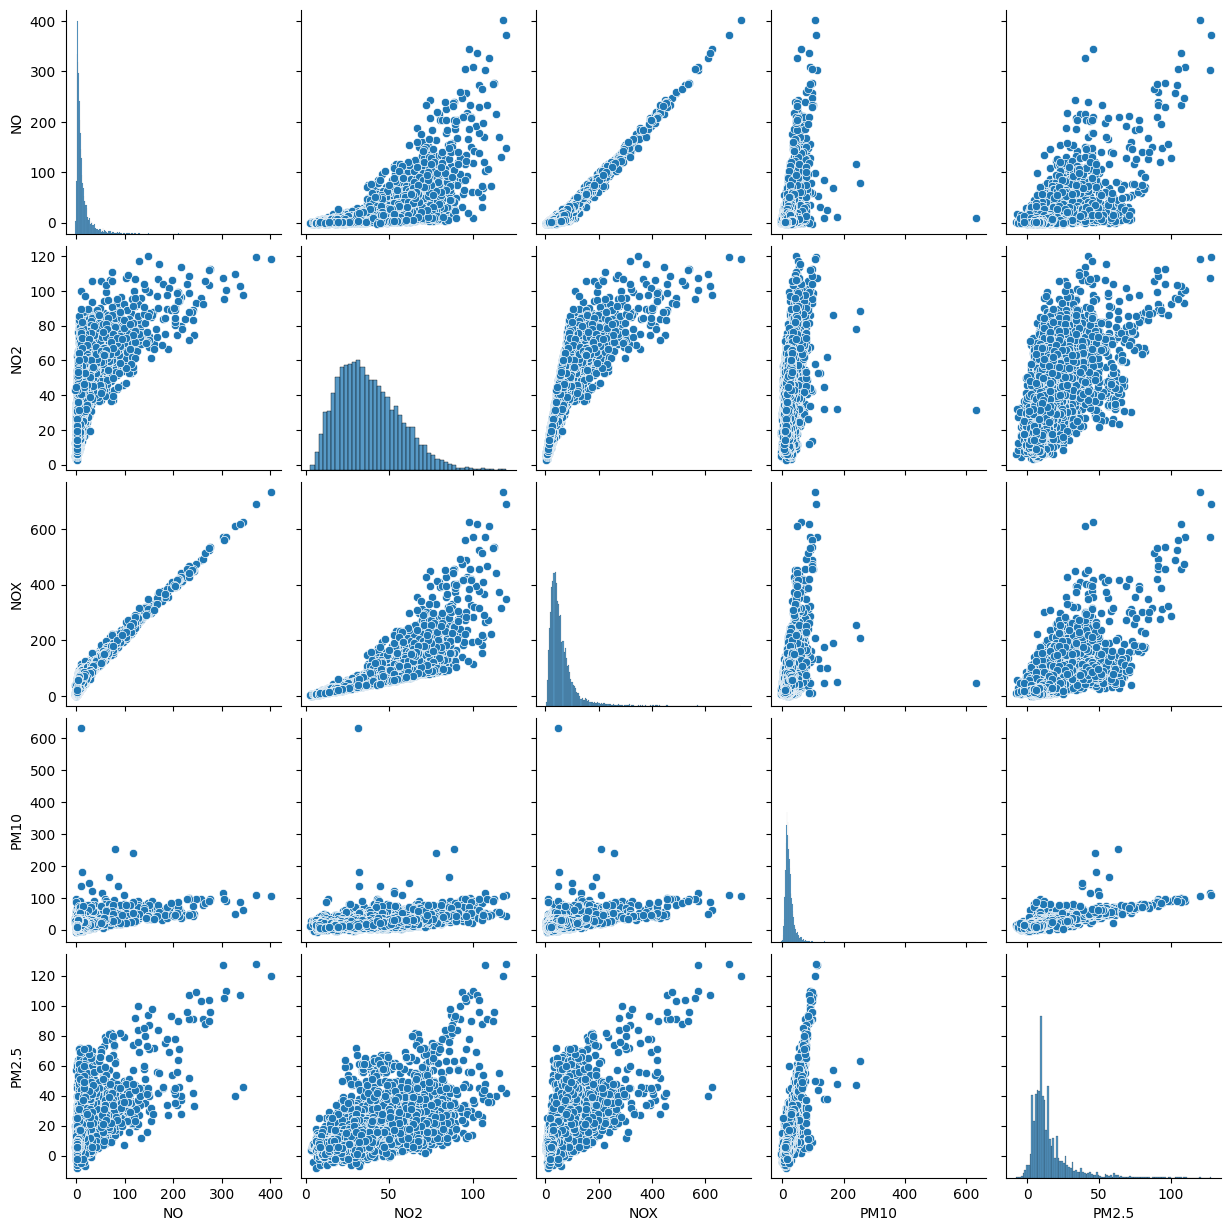

In [57]:
import seaborn as sns

air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

pvt_df = air_df.pivot(
    index="ReadingDateTime",
    columns="Species",
    values="Value"
)

sns.pairplot(pvt_df)

    The code ouputs what is known as scatter matrix. This code takes advantage of seaborn modue which is another very useful visualization moduel. To practice, subploting and resizing, recreate what seaborn can do with sns.pairplot(). (Hint: doing this with plt.subplot() might be a bit too challenging for you. First give it a try and figure out what is the challenge, then google plt.subplot2grid())

/tmp/ipykernel_253923/3982319793.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


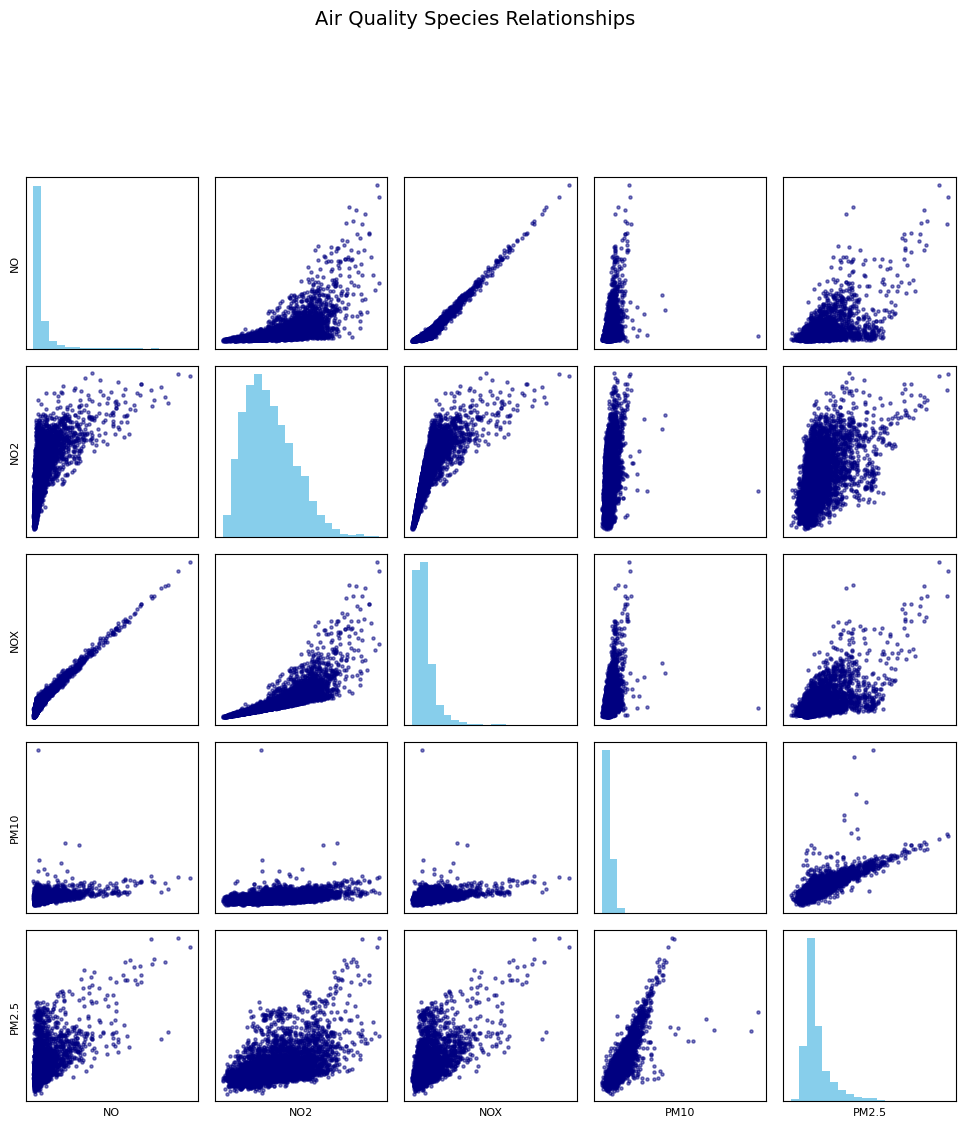

In [59]:
# Get species names and count
species = pvt_df.columns
n_species = len(species)

# Create figure with proper sizing
fig = plt.figure(figsize=(12, 12))
plt.suptitle('Air Quality Species Relationships', y=1.02, fontsize=14)

# Create gridspec for more control
gs = plt.GridSpec(n_species, n_species, wspace=0.1, hspace=0.1)

# Plot each combination
for i in range(n_species):
    for j in range(n_species):
        ax = plt.subplot(gs[i, j])
        
        if i == j:
            # Diagonal - show histogram
            ax.hist(pvt_df.iloc[:, i], bins=20, color='skyblue')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Off-diagonal - show scatter plot
            ax.scatter(pvt_df.iloc[:, j], pvt_df.iloc[:, i], 
                    s=5, alpha=0.5, color='navy')
            ax.set_xticks([])
            ax.set_yticks([])
        
        # Add axis labels only on edges
        if i == n_species-1:
            ax.set_xlabel(species[j], fontsize=8)
        if j == 0:
            ax.set_ylabel(species[i], fontsize=8)

plt.tight_layout()
plt.show()